# IBM HR Analytics - Employee Attrition Prediction

In [1]:
### Import Libraries

In [2]:
# Python libraries
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split
# from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
# import xgboost as xgb
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

warnings.filterwarnings('ignore')

In [3]:
# Read Data
dataset = pd.read_csv('./data/WA_Fn-UseC_-HR-Employee-Attrition.csv')


### Exploratory Data Analysis

In [4]:
# Rows, cols, describe and head
print(dataset.shape)
dataset.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# Describe
dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
# Check for missing values in the data
missingvals = dataset.isnull().sum().sum()
print('Total missing values = ', missingvals)
# x_train = dataset.drop(labels = ['Attrition','Over18','StandardHours'],axis = 1)

Total missing values =  0


In [7]:
# Replace target with 1s and 0s for Yes and No
dataset.Attrition.replace(to_replace = {'Yes':1, 'No':0}, inplace = True)
dataset.Attrition

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [8]:
attrition = dataset[(dataset['Attrition'] != 0)]
no_attrition = dataset[(dataset['Attrition'] == 0)]

#------------COUNT-----------------------
trace = go.Bar(x = (len(attrition), len(no_attrition)), y = ['Yes_attrition', 'No_attrition'], orientation = 'h', opacity = 0.8, marker=dict(
        color=['gold', 'lightskyblue'],
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  'Count of attrition variable')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)



In [9]:
### Correlation Plots

In [10]:
correlation = dataset.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale='Viridis',
                   colorbar   = dict() ,
                  )
layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                        autosize = False,
                        #height  = 1400,
                        #width   = 1600,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                     ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9)),
                       )
                  )
fig = go.Figure(data = [trace],layout = layout)
py.iplot(fig)

### Distribution of attrition various features

Text(0.5, 1.0, 'Agewise counts of people in organisation')

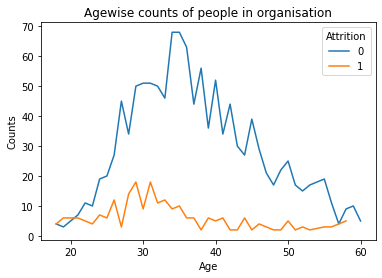

In [11]:
age_att=dataset.groupby(['Age','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
age_att
# plt.line(age_att,x='Age',y='Counts',color='Attrition',title='Agewise Counts of People in an Organization')
p = sns.lineplot(x='Age',y='Counts',hue='Attrition',data=age_att)
p.set_title("Agewise counts of people in organisation")

Text(0.5, 1.0, 'Monthly Income basis counts of people in organisation')

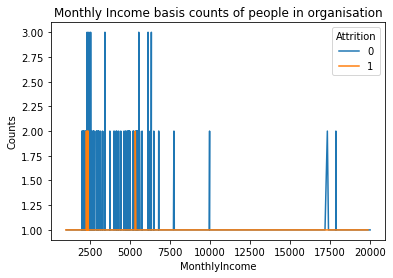

In [12]:
age_att=dataset.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
p = sns.lineplot(x='MonthlyIncome',y='Counts',hue='Attrition',data=age_att)
p.set_title("Monthly Income basis counts of people in organisation")

Text(0.5, 1.0, 'Department-wise counts of people in organisation')

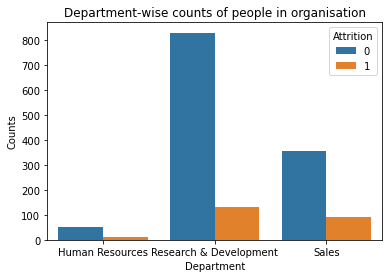

In [13]:
dept_att=dataset.groupby(['Department','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
p = sns.barplot(x='Department',y='Counts',hue='Attrition',data=dept_att)
p.set_title("Department-wise counts of people in organisation")

Text(0.5, 1.0, 'Environment Satisfaction counts of people in organisation')

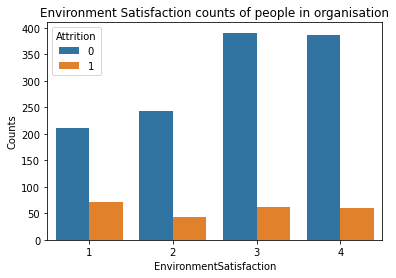

In [14]:
sats_att=dataset.groupby(['EnvironmentSatisfaction','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
# px.area(sats_att,x='EnvironmentSatisfaction',y='Counts',color='Attrition',title='Environment Satisfaction level Counts of People in an Organization')
p = sns.barplot(x='EnvironmentSatisfaction',y='Counts',hue='Attrition',data=sats_att)
p.set_title("Environment Satisfaction counts of people in organisation")

Text(0.5, 1.0, 'Work Life Balance counts of people in organisation')

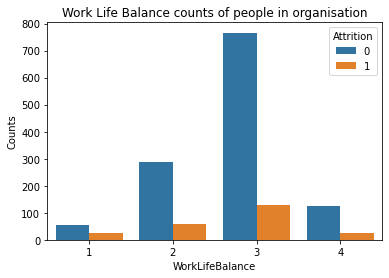

In [15]:
bal_att=dataset.groupby(['WorkLifeBalance','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
# px.area(sats_att,x='EnvironmentSatisfaction',y='Counts',color='Attrition',title='Environment Satisfaction level Counts of People in an Organization')
p = sns.barplot(x='WorkLifeBalance',y='Counts',hue='Attrition',data=bal_att)
p.set_title("Work Life Balance counts of people in organisation")

Text(0.5, 1.0, 'Count of Hike percentages people receive in organisation')

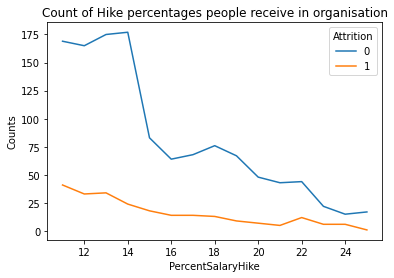

In [16]:
hike_att=dataset.groupby(['PercentSalaryHike','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
# px.area(sats_att,x='EnvironmentSatisfaction',y='Counts',color='Attrition',title='Environment Satisfaction level Counts of People in an Organization')
p = sns.lineplot(x='PercentSalaryHike',y='Counts',hue='Attrition',data=hike_att)
p.set_title("Count of Hike percentages people receive in organisation")

## Prediction

Splitting the data into train and test

Fit the training data to the Logistic Regression Model

Use the model to predict the Test data

Calculate Accuracy

<AxesSubplot:>

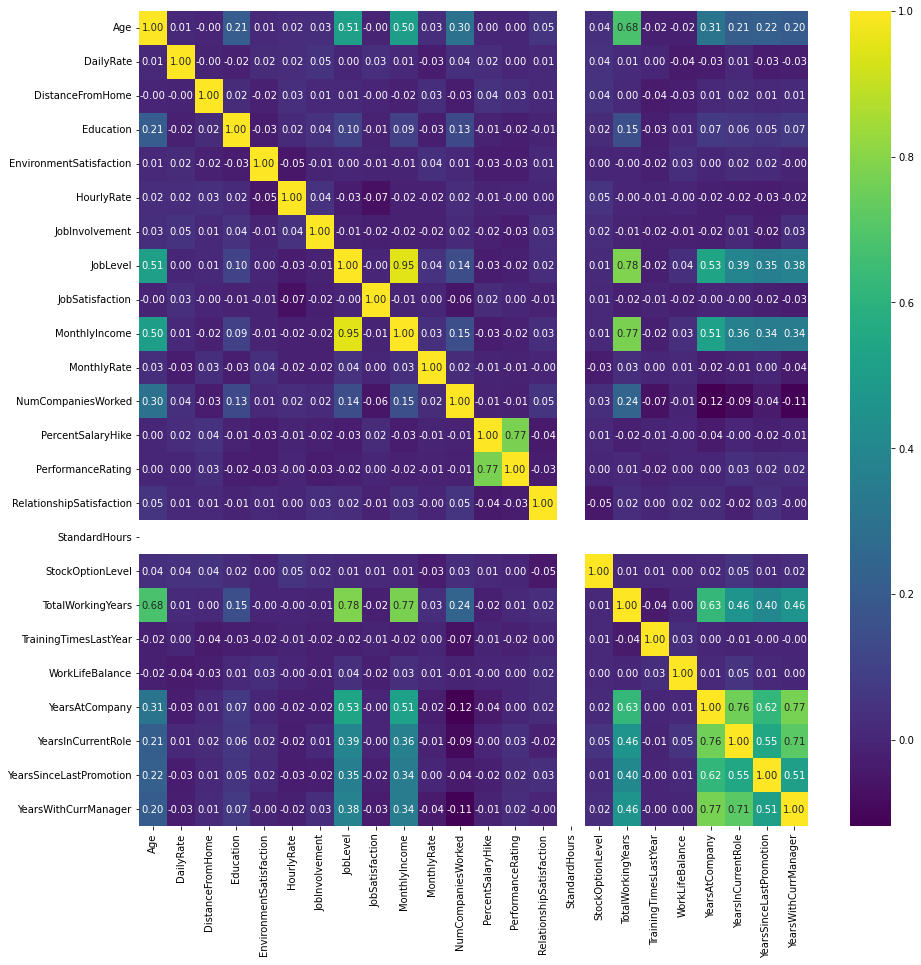

In [17]:
X=dataset[['Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction','StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
y=dataset[['Attrition']].values.ravel()
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(),annot=True,fmt='.2f',cmap='viridis')

In [18]:
X=dataset[['Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction','StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
y=dataset[['Attrition']].values.ravel()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
log_reg=LogisticRegression(C=1000,max_iter=10000)
log_reg.fit(X_train,y_train)
print('--------------------------------------------------------------------------')
print('Logistic Regression:')
print('Traning Model accruracy scores: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Test Model accruracy scores: {:.3f}'.format(log_reg.score(X_test,y_test)))
print('--------------------------------------------------------------------------')


--------------------------------------------------------------------------
Logistic Regression:
Traning Model accruracy scores: 0.858
Test Model accruracy scores: 0.848
--------------------------------------------------------------------------


In [19]:
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

### Confusion Matrix

In [20]:
confusion_matrix(y_test, y_pred_test)

array([[304,   6],
       [ 50,   8]], dtype=int64)

Text(33.0, 0.5, 'Actual')

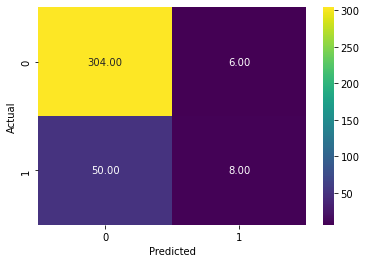

In [21]:
p = sns.heatmap(confusion_matrix(y_test, y_pred_test),annot=True,fmt='.2f',cmap='viridis')
p.set_xlabel('Predicted')
p.set_ylabel('Actual')